In [442]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # for plotting statistical graphs
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings # for warning control
from scipy import stats
from scipy.stats import norm, skew #for statistical calculations

In [494]:
#import data
path = 'F:/Dropbox/Columbia MSBA/IEOR E4501 Tools for Analytics/Project/airbnb-price-prediction/data.csv'
data = pd.read_csv(path)

G:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,25,26,27,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,56,57,60,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [444]:
# examine our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 68 columns):
id                        65282 non-null int64
log_price                 65282 non-null float64
property_type             65282 non-null object
room_type                 65282 non-null object
accommodates              65282 non-null int64
bathrooms                 65127 non-null float64
bed_type                  65282 non-null object
cancellation_policy       65282 non-null object
cleaning_fee              65282 non-null bool
city                      65282 non-null object
first_review              52558 non-null object
host_has_profile_pic      65136 non-null object
host_identity_verified    65282 non-null bool
host_response_rate        50463 non-null object
host_since                65136 non-null object
instant_bookable          65282 non-null bool
last_review               52588 non-null object
latitude                  65282 non-null float64
longitude                 65282 

In [495]:
# do data cleaning by deleting unmeaningful columns 
del_cols=['Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67']
data.drop(del_cols,axis=1,inplace=True)
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [446]:
# check the datatypes of all variables.
pd.options.display.max_rows = 65
dtypes = data.dtypes.reset_index()
dtypes.columns = ["Count", "Column Type"]
dtypes

,Count,Column Type
0,id,int64
1,log_price,float64
2,property_type,object
3,room_type,object
4,accommodates,int64
5,bathrooms,float64
6,bed_type,object
7,cancellation_policy,object
8,cleaning_fee,bool
9,city,object


In [447]:
# group by types
dtypes.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,3
1,int64,2
2,float64,7
3,object,13


In [448]:
# divide the variables into numerical variables and categorical variables
num_var=['accommodates','bathrooms','cancellation_fee','first_view','host_response_rate','host_since','latitude','longitude','number_of_reviews','review_scores_rating',
        'zipcode','bedrooms','beds']
cate_var=['property_type','room_type','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood']

In [449]:
# describe log_price column
data['log_price'].describe()

count    65282.000000
mean         4.785188
std          0.714140
min          0.000000
25%          4.317488
50%          4.718499
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [450]:
# calculate target variable
data['Saleprice']=np.exp(data['log_price'])

In [451]:
# draw histogram function
def drawHist(heights):
    plt.hist(heights, 20)
    plt.xlabel('Saleprice')
    plt.ylabel('Frequency')
    plt.title('Histogram of Saleprice')
    plt.show()

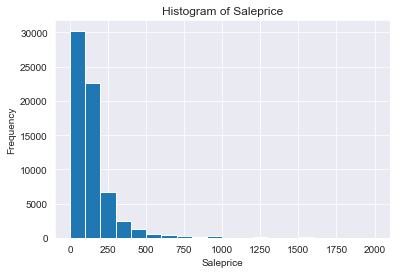

In [453]:
# draw 'Saleprice' histogram
drawHist(data['Saleprice'])

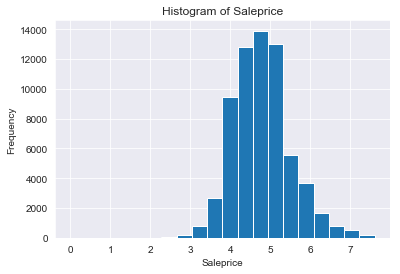

In [454]:
# draw 'log_price' histogram
drawHist(data['log_price'])
# The distribution is like a bell curve (normal distribution).

In [455]:
# drop 'Saleprice' variable to avoid complete correlation with 'log_price'
data.drop('Saleprice', axis=1, inplace=True)

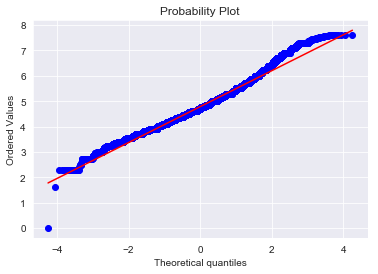

In [456]:
# plot probability distribution  
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
plt.show()

In [457]:
# data cleaning with dates function
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y/%m/%d')
    d2 = datetime.datetime.strptime(now_time, '%Y/%m/%d')
    if str(date) !='nan':
        d1 = datetime.datetime.strptime(str(date),'%Y/%m/%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [496]:
# convert dates to number of days 
dates_to_transform=['first_review','host_since','last_review']
for col in dates_to_transform:
    data[col]=data[col].apply(dif_time)

In [497]:
# convert to type int
for u in data.columns:
    if data[u].dtype==bool:
        data[u]=data[u].astype('int')

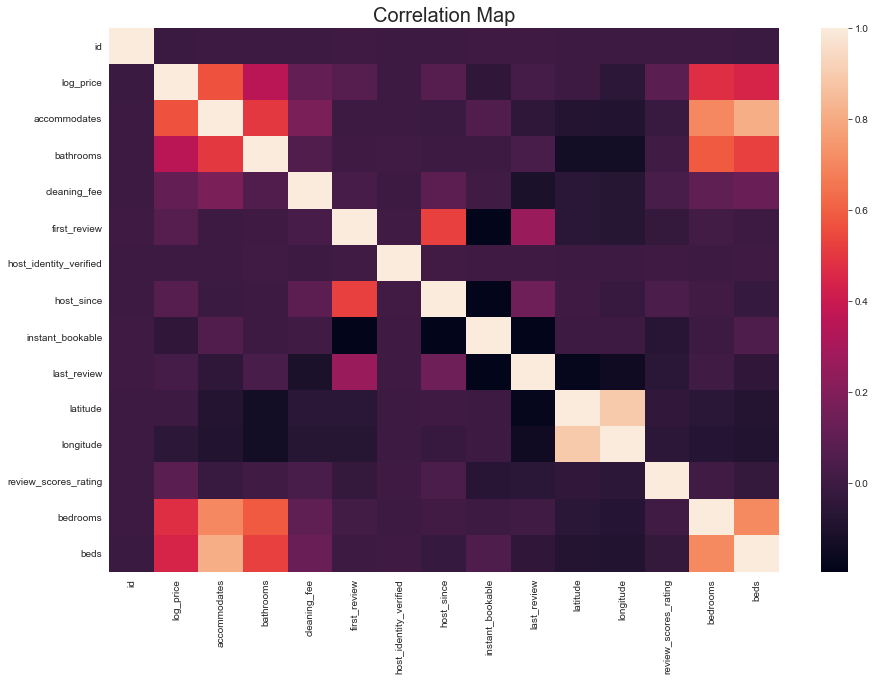

In [460]:
#plot correlation matrix
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

def correlation_map(df):
    correlation = data.corr()
    plt.subplots(figsize=(15,10))
    plt.title('Correlation Map', fontsize=20)
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    
correlation_map(data)

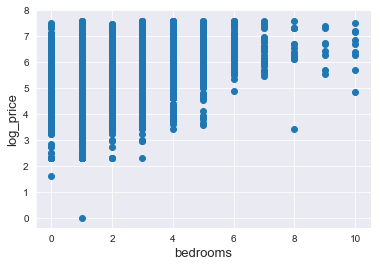

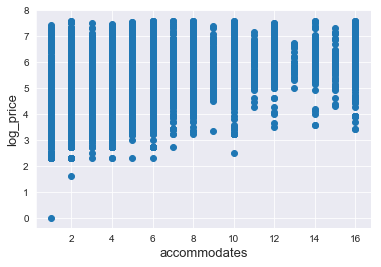

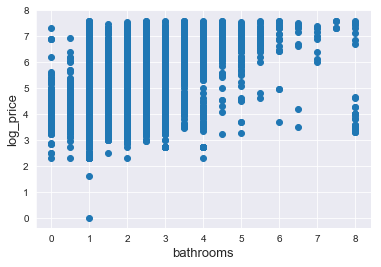

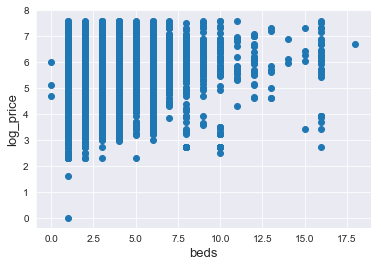

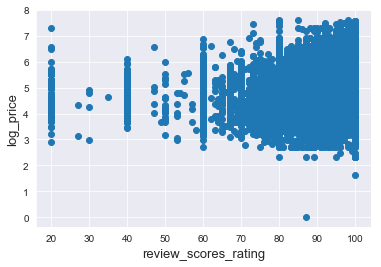

G:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x864 with 0 Axes>

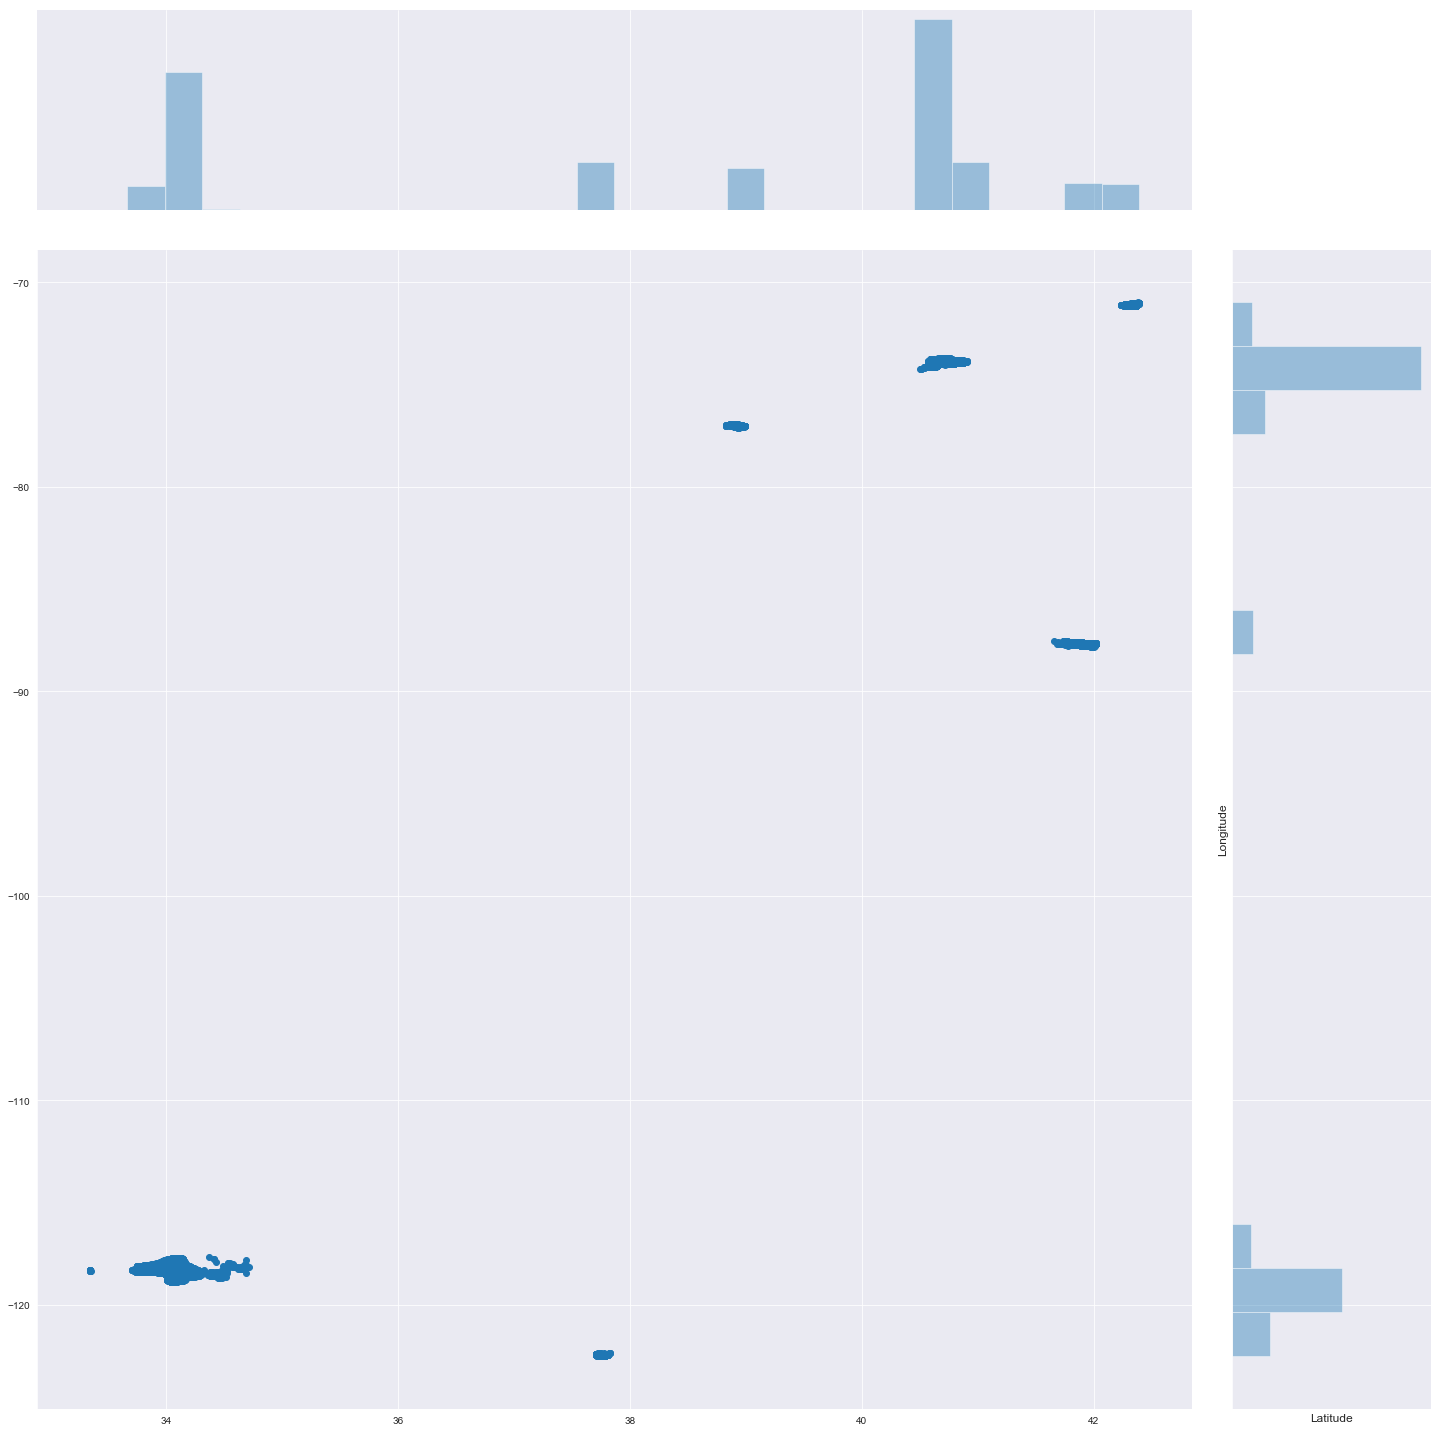

In [461]:
# scatter plot 
# log_price vs bedrooms
fig, ax = plt.subplots()
ax.scatter(data['bedrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

# log_price vs accomodates
fig, ax = plt.subplots()
ax.scatter(data['accommodates'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('accommodates', fontsize=13)
plt.show()

# log_price vs bathrooms
fig, ax = plt.subplots()
ax.scatter(data['bathrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

# log_price vs beds
fig, ax = plt.subplots()
ax.scatter(data['beds'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

# log_price vs review_scores_rating
fig, ax = plt.subplots()
ax.scatter(data['review_scores_rating'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('review_scores_rating', fontsize=13)
plt.show()

# explore the latitude and longitude variable distributions by joint plotting them
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=20)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(-0.5, 4.5, 0, 10)

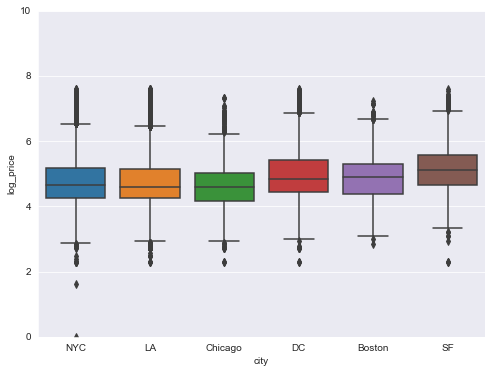

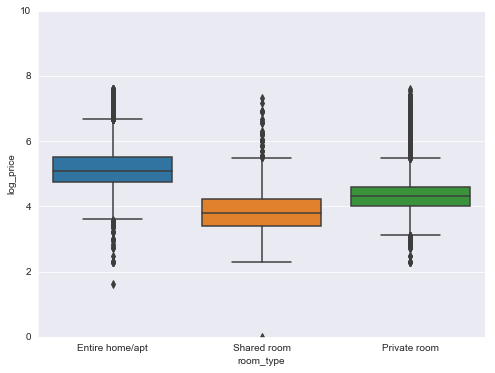

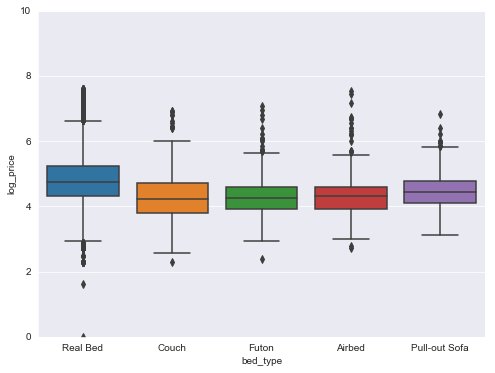

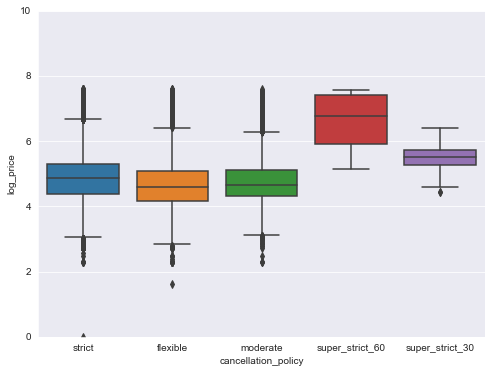

In [462]:
# box plot
# log_price vs city
var = 'city'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs room_type
var = 'room_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# # log_price vs property_type
# var = 'property_type'
# price_data = pd.concat([data['log_price'], data[var]], axis=1)
# f,ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="log_price", data=price_data)
# fig.axis(ymin=0, ymax=10)

# log_price vs bed_type
var = 'bed_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs cancellation_policy
var = 'cancellation_policy'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

In [463]:
#calculate missing data ratio
total_missing = data.isnull().sum()
missing_ratio = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total_missing, missing_ratio], axis=1, keys=['total_missing', 'missing_ratio'])
missing_data = missing_data.ix[missing_data['missing_ratio']>0]
missing_data = missing_data.sort_values(by='missing_ratio',ascending=False)
missing_data.head(20)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,total_missing,missing_ratio
host_response_rate,14819,0.227000
review_scores_rating,13439,0.205861
first_review,12724,0.194908
last_review,12694,0.194449
neighbourhood,5178,0.079317
zipcode,759,0.011626
bathrooms,155,0.002374
host_has_profile_pic,146,0.002236
host_since,146,0.002236
beds,123,0.001884


Text(0.5,1,'Ratio of missing data by properties')

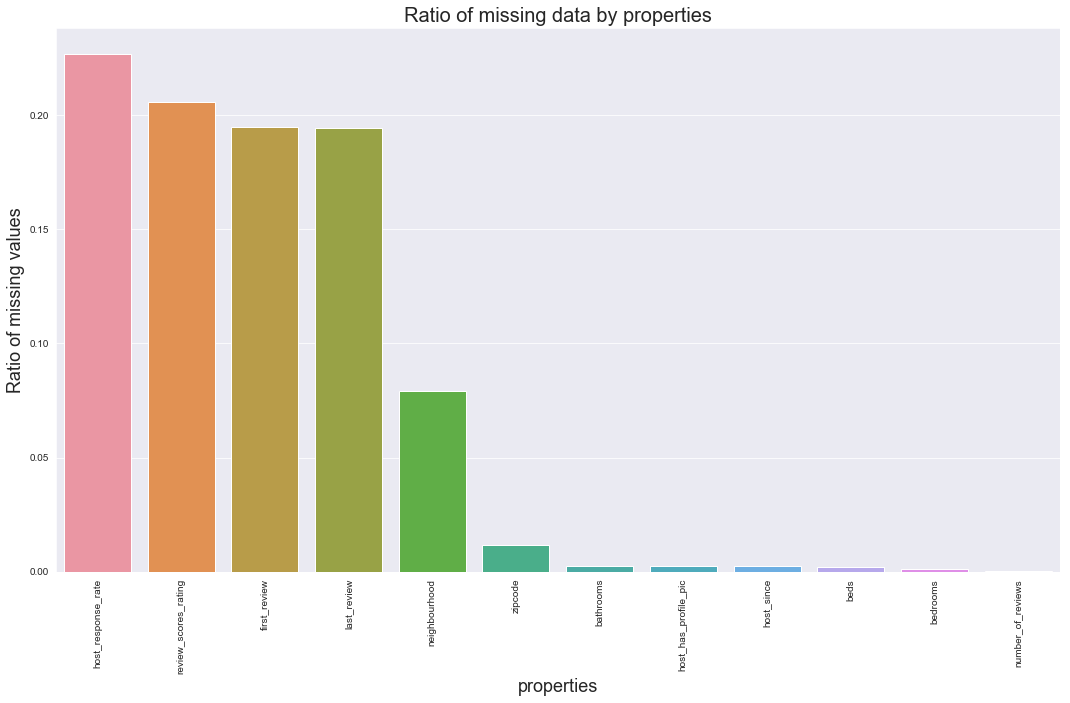

In [464]:
#plot ratio of missing
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data.missing_ratio)
plt.xlabel('properties', fontsize=18)
plt.ylabel('Ratio of missing values', fontsize=18)
plt.title('Ratio of missing data by properties', fontsize=20)

In [498]:
# to many missing_values
#delete column host_response_rate
data.drop('host_response_rate', axis=1, inplace=True)

In [499]:
# fill NA by none
col_to_del=['neighbourhood','zipcode']
for col in col_to_del:
    data[col] = data[col].fillna('None')

In [500]:
# only fetch data with not "None" values
data = data[(data.neighbourhood != 'None') & (data.zipcode != 'None')]

In [501]:
# fill NA by none
fillbynone=['first_review','host_since','last_review','host_has_profile_pic','number_of_reviews']
for col in fillbynone:
    data[col] = data[col].fillna('None')

In [502]:
#fill NA by numerical value
fillbymedian=['review_scores_rating']
for col in fillbymedian:
    data[col] = data[col].fillna(data[col].transform(lambda x: x.fillna(x.median())))

In [503]:
#fill NA by mode (the value that occurs most frequently in a given set of data)
fillbymode=['bathrooms','beds','bedrooms']
for col in fillbymode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [504]:
# check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)

In [505]:
# transform some variables to string type
data['bedrooms'] = data['bedrooms'].apply(str)
data['bathrooms'] = data['bathrooms'].apply(str)
data['accommodates']=data['accommodates'].apply(str)
data['beds']=data['beds'].apply(str)

In [473]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,20605308,6.684612,House,Entire home/apt,16,5.0,Real Bed,strict,1,NYC,...,1,433,40.684922,-73.954891,Bedford-Stuyvesant,70,95.0,11216,8.0,18.0
1,2186452,6.388561,House,Entire home/apt,16,7.0,Real Bed,strict,0,LA,...,1,581,33.975376,-118.295995,South LA,16,100.0,90044,10.0,16.0
2,17764355,5.700444,House,Entire home/apt,16,5.0,Real Bed,strict,1,Chicago,...,0,623,41.947212,-87.655574,Wrigleyville,13,95.0,60613,10.0,16.0
3,1446537,7.170120,House,Entire home/apt,16,7.0,Real Bed,flexible,0,LA,...,0,597,34.048690,-118.319579,Mid-Wilshire,0,89.0,90019,10.0,16.0
4,13399619,6.257668,House,Entire home/apt,16,4.0,Real Bed,flexible,0,NYC,...,1,None,40.674952,-73.819140,South Ozone Park,0,96.0,11420,10.0,16.0


In [506]:
# explore skewness of data
numeric_feats =data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 8 skewed numerical features to Box Cox transform


In [541]:
from sklearn.preprocessing import LabelEncoder
for c in data.columns:
    if data[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(list(data[c].values))

In [542]:
# drop unecessary id information
data.drop('id', axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [543]:
# split data to train and test for future regression
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(data,test_size=0.2)

train_data.to_csv('train_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

In [547]:
train_data.head()


,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
50026,4.174387,17,1,8,2,4,1,1,4,2030,...,1,776,40.714662,-73.729818,286,338,87.0,321,1,1
42024,4.219508,0,0,9,2,4,1,1,1,2310,...,0,908,41.897154,-87.629119,390,289,95.0,487,1,1
6402,5.298317,17,0,10,4,4,0,1,3,2200,...,0,1009,34.149483,-118.022504,26,2,20.0,815,4,11
45346,4.605170,0,1,0,2,4,2,0,4,2261,...,0,1037,40.709290,-73.940277,611,415,93.0,186,1,1
3730,5.010635,17,0,12,3,4,0,0,2,2526,...,0,1335,38.859313,-76.956059,268,0,96.0,380,4,12


In [545]:
test_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
54437,5.686975,0,1,0,2,4,0,0,4,2526,...,1,1335,40.778667,-73.979139,563,0,96.0,41,1,1
53706,4.234107,0,1,8,4,4,2,1,4,2526,...,0,1335,40.718105,-73.962220,611,0,96.0,250,1,1
62218,4.564348,0,0,8,2,4,1,1,3,19,...,0,1034,34.062053,-118.295908,356,474,97.0,573,0,1
61689,4.653960,17,0,8,2,4,1,1,3,496,...,0,918,33.994988,-118.457737,570,205,98.0,727,0,1
50689,4.007333,0,1,8,2,4,2,1,4,2151,...,1,799,40.752968,-73.873547,285,111,84.0,279,1,1


In [530]:
# examine our data
train_data.info

<bound method DataFrame.info of        log_price    property_type        room_type accommodates bathrooms  \
53442   5.010635        Apartment     Private room            2       1.5   
65271   5.176150        Apartment     Private room            1       1.5   
36753   4.700480        Apartment     Private room            2       1.0   
53954   4.553877            House     Private room            3       1.0   
37831   4.317488        Apartment     Private room            2       1.5   
29783   4.700480        Apartment  Entire home/apt            3       1.0   
32374   4.382027        Apartment      Shared room            2       0.5   
18399   5.783825            House     Private room            3       1.0   
61223   5.010635        Apartment  Entire home/apt            3       1.0   
48834   3.688879            House     Private room            2       1.5   
35096   4.595120        Apartment     Private room            2       1.0   
45388   4.248495            House     Privat

In [548]:
# examine our data
test_data.info

<bound method DataFrame.info of        log_price  property_type  room_type  accommodates  bathrooms  bed_type  \
54437   5.686975              0          1             0          2         4   
53706   4.234107              0          1             8          4         4   
62218   4.564348              0          0             8          2         4   
61689   4.653960             17          0             8          2         4   
50689   4.007333              0          1             8          2         4   
52740   4.595120             17          1             8          3         4   
21772   4.382027             17          1            10          2         4   
33583   4.317488              0          1             8          2         4   
17921   3.988984             17          1             9          2         4   
35585   3.871201              0          1             0          2         4   
53350   4.174387             17          1             0          2         2

In [549]:
#if one column only has one value, consider to delete the column
train_columns_to_remove = [col for col in train_data.columns if train_data[col].nunique() == 1]
test_columns_to_remove = [col for col in test_data.columns if test_data[col].nunique() == 1]

In [550]:
# no need to remove columns
print(train_columns_to_remove)
print(test_columns_to_remove)

[]
[]


In [482]:
# check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)
# No missing data! Data preprocessing finished! Continue.

In [532]:
# X = data.drop("log_price",axis=1).values
# y = data["log_price"].values

In [512]:
from sklearn.model_selection import KFold, cross_val_score #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by d


In [513]:
# from sklearn.preprocessing import LabelEncoder

In [535]:
# for col in data.columns:
#     print(col)
#     lbl = LabelEncoder()
#     lbl.fit(list(train_data[col].values.astype('str')) + list(test_data[col].values.astype('str')))
#     train_data[col] = lbl.transform(list(train_data[col].values.astype('str')))
#     test_data[col] = lbl.transform(list(test_data[col].values.astype('str')))

log_price


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


property_type
room_type
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
first_review
host_has_profile_pic
host_identity_verified
host_since
instant_bookable
last_review
latitude
longitude
neighbourhood
number_of_reviews
review_scores_rating
zipcode
bedrooms
beds


In [536]:
#from sklearn.model_selection import TimeSeriesSplit

In [537]:
import lightgbm as lgb

In [538]:
params = {"objective" : "regression", "metric" : "rmse", "max_depth": 8, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 257, "learning_rate" : 0.01, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 5}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

In [551]:
#train = train.sort_values('date')
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_test = test_data.drop('log_price', axis=1)
# I use TimeSeriesSplit as we have time series
#tscv = TimeSeriesSplit(n_splits=10)

In [553]:
#LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient.

for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    #print(f'Train samples: {len(train_index)}. Valid samples: {len(test_index)}')
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=10)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
prediction /= n_fold

Fold: 0
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.354412	valid_1's rmse: 0.395985
[1000]	training's rmse: 0.331934	valid_1's rmse: 0.387997
[1500]	training's rmse: 0.316142	valid_1's rmse: 0.38547
Early stopping, best iteration is:
[1583]	training's rmse: 0.31373	valid_1's rmse: 0.385159
Fold: 1
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.355798	valid_1's rmse: 0.390492
[1000]	training's rmse: 0.332693	valid_1's rmse: 0.38205
[1500]	training's rmse: 0.316801	valid_1's rmse: 0.379736
Early stopping, best iteration is:
[1591]	training's rmse: 0.314179	valid_1's rmse: 0.379481
Fold: 2
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.355103	valid_1's rmse: 0.388303
[1000]	training's rmse: 0.332758	valid_1's rmse: 0.379749
Early stopping, best iteration is:
[1259]	training's rmse: 0.324816	valid_1's rmse: 0.378401
Fold: 3
Training until validation scores don't improv

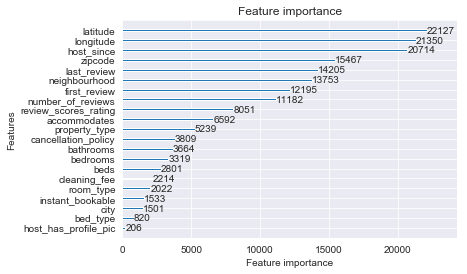

In [554]:
# Use lgb model to list the feature importance from the most important feature to the least important feature.

lgb.plot_importance(model, max_num_features=30);

In [556]:
# import catboost library
from catboost import CatBoostRegressor

In [557]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [558]:
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 50,
                             od_wait=20)
model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              verbose=True)
    
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)



0:	learn: 4.3770080	test: 4.3631173	best: 4.3631173 (0)	total: 57.7ms	remaining: 57.6s
1:	learn: 3.9485836	test: 3.9351272	best: 3.9351272 (1)	total: 561ms	remaining: 4m 39s
2:	learn: 3.5661436	test: 3.5523153	best: 3.5523153 (2)	total: 1.19s	remaining: 6m 36s
3:	learn: 3.2213762	test: 3.2075290	best: 3.2075290 (3)	total: 1.8s	remaining: 7m 28s
4:	learn: 2.9089702	test: 2.8949134	best: 2.8949134 (4)	total: 1.91s	remaining: 6m 20s
5:	learn: 2.6317070	test: 2.6172220	best: 2.6172220 (5)	total: 1.94s	remaining: 5m 22s
6:	learn: 2.3807603	test: 2.3664074	best: 2.3664074 (6)	total: 2.46s	remaining: 5m 48s
7:	learn: 2.1566409	test: 2.1426384	best: 2.1426384 (7)	total: 2.98s	remaining: 6m 9s
8:	learn: 1.9561717	test: 1.9424084	best: 1.9424084 (8)	total: 3.5s	remaining: 6m 25s
9:	learn: 1.7752341	test: 1.7618009	best: 1.7618009 (9)	total: 3.66s	remaining: 6m 2s
10:	learn: 1.6147810	test: 1.6009728	best: 1.6009728 (10)	total: 3.76s	remaining: 5m 38s
11:	learn: 1.4708511	test: 1.4573331	best: 1.

95:	learn: 0.4247453	test: 0.4180245	best: 0.4180245 (95)	total: 28.1s	remaining: 4m 24s
96:	learn: 0.4247453	test: 0.4180240	best: 0.4180240 (96)	total: 28.1s	remaining: 4m 21s
97:	learn: 0.4247452	test: 0.4180237	best: 0.4180237 (97)	total: 28.2s	remaining: 4m 19s
98:	learn: 0.4247452	test: 0.4180239	best: 0.4180237 (97)	total: 28.2s	remaining: 4m 16s
99:	learn: 0.4247451	test: 0.4180235	best: 0.4180235 (99)	total: 28.2s	remaining: 4m 14s
100:	learn: 0.4235657	test: 0.4169762	best: 0.4169762 (100)	total: 28.8s	remaining: 4m 16s
101:	learn: 0.4235657	test: 0.4169761	best: 0.4169761 (101)	total: 28.8s	remaining: 4m 13s
102:	learn: 0.4235656	test: 0.4169760	best: 0.4169760 (102)	total: 28.9s	remaining: 4m 11s
103:	learn: 0.4235656	test: 0.4169754	best: 0.4169754 (103)	total: 28.9s	remaining: 4m 8s
104:	learn: 0.4235655	test: 0.4169748	best: 0.4169748 (104)	total: 28.9s	remaining: 4m 6s
105:	learn: 0.4235654	test: 0.4169758	best: 0.4169748 (104)	total: 29s	remaining: 4m 4s
106:	learn: 0.

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout, BatchNormalization
#from keras.layers.advanced_activations import PReLU
#from keras.layers.noise import GaussianDropout
#from keras.optimizers import Adam
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer




# data = data.merge(pd.get_dummies(data.property_type, drop_first=True, prefix='PT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.room_type, drop_first=True, prefix='RT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.bed_type, drop_first=True, prefix='BT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.cancellation_policy, drop_first=True, prefix='CP'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.city, prefix='City'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.host_has_profile_pic, drop_first=True, prefix='HHPP'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.host_identity_verified, drop_first=True, prefix='HHPV'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.instant_bookable, drop_first=True, prefix='IB'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.neighbourhood, drop_first=True, prefix='NE'), left_index=True, right_index=True)

# del data['property_type']
# del data['room_type'],
# del data['bed_type']
# del data['cancellation_policy']
# del data['city']
# del data['host_has_profile_pic']
# del data['host_identity_verified']
# del data['instant_bookable']
# del data['neighbourhood']
# del data['Saleprice']


In [560]:
!pip install xgboost

In [2]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV # Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

G:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
print("logPrice Min")
print(data['log_price'].min())
print("logPrice Mean")
print(data['log_price'].mean())
print("logPrice Median")
print(data['log_price'].median())
print("logPrice Max")
print(data['log_price'].max())
print("logPrice Std")
print(data['log_price'].std())

logPrice Min


NameError: name 'data' is not defined

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [1]:
#select features using threshold
thresh = 5 * 10**(-2)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# test 
select_X_test = selection.transform(X_test)

NameError: name 'xgb' is not defined

In [ ]:
### Test the scores for XGBoost
xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb1.fit(X_train, y_train)

y_hat = xgb1.predict(X_test)

xgb1.score(X_test,y_test)

n_folds = 10
kfold = KFold(n_splits=n_folds, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv= kfold,scoring='r2', n_jobs=-1)

In [ ]:
### XGBoost ###

xgb_params = {
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.75,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

num_boost_rounds = 200
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

xgb_pred1 = model.predict(dtest)

print(mean_absolute_error(xgb_pred1, y_test))
print(mean_squared_error(xgb_pred1, y_test))

print(pd.DataFrame(xgb_pred1).head())

xgb_params = {
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.75,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(select_X_train, y_train)
dtest = xgb.DMatrix(select_X_test)

num_boost_rounds = 200

model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

xgb_pred2 = model.predict(dtest)

print(mean_absolute_error(xgb_pred2, y_test))

print(mean_squared_error(xgb_pred2, y_test))

In [ ]:
####################
### RandomForest ###
####################


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

y_hat = rf_random.predict(X_test)

print(mean_absolute_error(y_hat, y_test))

print(mean_squared_error(y_hat, y_test))